# Building and pruning of large combiner matrices
With, kernuller, it is easy to build large matrices for combiners of many inputs (within the bounds of your RAM).
Here, we show how to identify the amount of observations provided by those combiners, and some tools to reduce the number of outputs to its minimum, which is still a challenge.
## Evaluation of the number of independent outputs
The first step is to be able to evaluate the number of independant outputs.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import kernuller
import astropy.coordinates
import astropy.units as u

from time import time

Building a model from scratch


Here, we use set up a number of random binary parameters that must cover the input (observed scene parameter space). This number should be larger than the number of outputs of the combiners tested. (Using random numbers helps making sure we do not fall into symmetry or spacial frequency tropes, but the analysis should also work with a grid of source positions). 

In [2]:
nrands = 400
randrhos = 0.5+ 40*np.random.rand(nrands)
randthetas = 360*np.random.rand(nrands)
randconts = 400*np.ones(nrands)
params = np.array([[randrhos[i], randthetas[i], randconts[i]] for i in range(randrhos.shape[0])])

We build a specific `CHARA2` array that has 7 apertures in a non-redundant configuration.

For each size of array (3 to 7 apertures):

1. We use the `kernuller.expected_numbers()` method to guess at what numbers we will get for a given number of apertures
1. We build a kernuller object
1. then use the `get_rank()` methods with the array of test parameters
    1. once for the nulls
    1. once for the kernels, to get the number of dimensions of both the set of nulls and the set of kernel nulls.

The `get_rank()` method computes the combiner's outputs (or kernel-outputs) for the whole set of inputs. These outputs constitute a family of outputs. The number of independent outputs is the number of independent vectors in this family.

In [3]:
CHARA2 = np.vstack((kernuller.CHARA, np.array([30.,30.])))
nas = np.arange(3,8)
nullranks = []
kernranks = []
sizes = []
for i in nas:
    print("=====================================================")
    print("Working on a %d -input combiner"%(i))
    kernuller.expected_numbers(i)
    print("=====================================================")
    mykernuller = kernuller.kernuller(CHARA2[:i], 3.6e-6)
    mykernuller.build_procedural_model(verbose=False)
    sizes.append(mykernuller.Np.shape[0])
    anullrank = mykernuller.get_rank(params=params, mode="")
    nullranks.append(anullrank)
    akernelrank = mykernuller.get_rank(params=params, mode="kernels")
    kernranks.append(akernelrank)
    print("Found a null rank of %d"%(anullrank))
    print("Found a kernel rank of %d"%(akernelrank))
    print("=====================================================")
sizes = np.array(sizes)
nullranks = np.array(nullranks)
kernranks = np.array(kernranks)

Working on a 3 -input combiner
Assuming nonredundant baselines
Baselines 3.0
Number of second order derivatives 3.0
Number of nulls 2
Independant nulls 2.0


<IPython.core.display.Math object>

Robust observables 1.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Assuming cropping for full signal of non-redundant array:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Building a model from scratch
Found a null rank of 2
Found a kernel rank of 1
Working on a 4 -input combiner
Assuming nonredundant baselines
Baselines 6.0
Number of second order derivatives 6.0
Number of nulls 6
Independant nulls 6.0


<IPython.core.display.Math object>

Robust observables 3.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Assuming cropping for full signal of non-redundant array:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Building a model from scratch
Found a null rank of 6
Found a kernel rank of 3
Working on a 5 -input combiner
Assuming nonredundant baselines
Baselines 10.0
Number of second order derivatives 10.0
Number of nulls 24
Independant nulls 12.0


<IPython.core.display.Math object>

Robust observables 6.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Assuming cropping for full signal of non-redundant array:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Building a model from scratch
Found a null rank of 12
Found a kernel rank of 6
Working on a 6 -input combiner
Assuming nonredundant baselines
Baselines 15.0
Number of second order derivatives 15.0
Number of nulls 120
Independant nulls 20.0


<IPython.core.display.Math object>

Robust observables 10.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Assuming cropping for full signal of non-redundant array:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Building a model from scratch
Found a null rank of 20
Found a kernel rank of 10
Working on a 7 -input combiner
Assuming nonredundant baselines
Baselines 21.0
Number of second order derivatives 21.0
Number of nulls 720
Independant nulls 30.0


<IPython.core.display.Math object>

Robust observables 15.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Assuming cropping for full signal of non-redundant array:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Building a model from scratch
Found a null rank of 30
Found a kernel rank of 15


## Now let's make a pretty plot of our results...

6 120
7 720


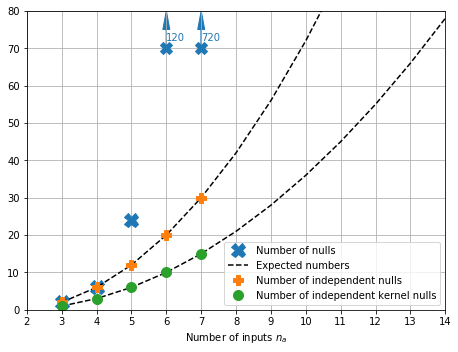

In [4]:
thnas = np.arange(3,18)
fig = plt.figure(figsize=(7.5, 5.5))
plt.plot(nas[:-2], sizes[:-2],marker="X",
         linestyle="None",markersize=14, label="Number of nulls")

plt.plot(thnas, (thnas-1)*(thnas-2), "k--", label="Expected numbers")
plt.plot(nas, nullranks,marker="P",
         linestyle="None",markersize=10, label="Number of independent nulls")
plt.plot(thnas, 1/2*(thnas-1)*(thnas-2), "k--")
plt.plot(nas, kernranks,marker="o",
         linestyle="None",markersize=10, label="Number of independent kernel nulls")
#plt.plot(9, 8, color="C1", marker="s", label="9 apertures cascaded nulls")
#plt.plot(9, 4, color="C2", marker="s", label="9 apertures cascaded kernel nulls")
extranas = nas[-2:]
extrasizes = sizes[-2:]
plt.plot(extranas, 70*np.ones_like(extranas), marker="X",color="C0",
         markersize=12, linestyle="None")
for anextranas, anextrasize  in zip(extranas, extrasizes):
    print(anextranas,anextrasize)
    plt.arrow(anextranas, 70, 0, 5, head_width=0.2, head_length=5, color="C0")
    plt.text(anextranas, 70+2, str(anextrasize),color="C0")
plt.legend(loc="lower right")
plt.ylim(0, 80)
plt.xlim(2, 14)
plt.xticks(ticks=np.arange(2,15))
plt.xlabel(r"Number of inputs $n_a$")
plt.grid()
#plt.title("Growth of kernel nullers")
plt.show()

# Building reduced combiners
## What it is about
Now the possibility to reduce the combiners to those numbers is an entirely different matter. The delicate part is to make sure that the matrix we build ( by adding or removing rows ) remains the matrix of a lossless combiner.

The matrices of lossless combiners are semi-unitary to the left, meaning that that their conjugate-transpose is their left-inverse:
$$\mathbf{M}^H\mathbf{M} = \mathbf{I}.$$
This also means (equivalent) that all their singular values are ones.


The way we have used is implemented in the algorithm offerred in `generative_random_pruning()`.

The algorithm will try random ways to build a matrix, recording the steps it took (the recipe), and saving this recipe if the result is both lossless and complete (gives full rank *kernels*).



In [30]:
statlocs = kernuller.CHARA
mykernuller = kernuller.kernuller(statlocs,3.6e-6)
mykernuller.build_procedural_model(verbose=False)

Building a model from scratch


## One of the problems with this approach that inside the function, there is no good way to stop the search yet keep the recipes found...
For the 6T combination, you have to run it for around 2000 iterations if you want to be relatively sure to find something (10-15 minutes on a decent workstation).

In [31]:
matrices, recipes = kernuller.generative_random_pruning(mykernuller.Ms, 2000)

 11%|█▏        | 228/2000 [01:12<10:09,  2.91it/s]

FOUND ONE!!!
[85 33 13 82 23 33 91 31 49 28 75 48 68 18 86 67 53  9 35 79  5  3 10 73
 11 24 17 26  2 52 55 14 41  6 33  0 25  7 29 18 24  7  6 27 31 29  8  9]


 61%|██████▏   | 1228/2000 [06:35<04:01,  3.20it/s]

FOUND ONE!!!
[ 41  85  46  33 106  29  49  37  75  91  52  40  37  24  67  11  82  61
  49   1  34  68  68   6  60  10  54  13  41  61  45  49  41   9]


 73%|███████▎  | 1451/2000 [07:47<03:01,  3.03it/s]

FOUND ONE!!!
[83 15 93 84 73 29 39  3 11 44 11 24  7 37 60 43 14 56 82 52 67 45 61 28
 29 67 28  2 57 25 12 57 40 52 34  4 31 31 12  9 29 20  9 33 12]


100%|██████████| 2000/2000 [10:45<00:00,  3.18it/s]


In [19]:
print("We found %d matrices, here is one:"%(len(matrices)))
kernuller.fprint(matrices[0], r"\mathbf{M}_{0} = ")

We found 3 matrices, here is one:


Matrix([
[ sqrt(6)/6,                 sqrt(6)/6,                 sqrt(6)/6,                 sqrt(6)/6,                 sqrt(6)/6,                 sqrt(6)/6],
[sqrt(6)/12,               -sqrt(6)/12,  sqrt(6)*exp(2*I*pi/3)/12, sqrt(6)*exp(-2*I*pi/3)/12,   sqrt(6)*exp(-I*pi/3)/12,    sqrt(6)*exp(I*pi/3)/12],
[sqrt(6)/12,               -sqrt(6)/12, sqrt(6)*exp(-2*I*pi/3)/12,  sqrt(6)*exp(2*I*pi/3)/12,    sqrt(6)*exp(I*pi/3)/12,   sqrt(6)*exp(-I*pi/3)/12],
[sqrt(6)/12,   sqrt(6)*exp(-I*pi/3)/12,               -sqrt(6)/12,    sqrt(6)*exp(I*pi/3)/12,  sqrt(6)*exp(2*I*pi/3)/12, sqrt(6)*exp(-2*I*pi/3)/12],
[sqrt(6)/12,    sqrt(6)*exp(I*pi/3)/12,               -sqrt(6)/12,   sqrt(6)*exp(-I*pi/3)/12, sqrt(6)*exp(-2*I*pi/3)/12,  sqrt(6)*exp(2*I*pi/3)/12],
[sqrt(6)/12,   sqrt(6)*exp(-I*pi/3)/12,               -sqrt(6)/12,  sqrt(6)*exp(2*I*pi/3)/12, sqrt(6)*exp(-2*I*pi/3)/12,    sqrt(6)*exp(I*pi/3)/12],
[sqrt(6)/12,    sqrt(6)*exp(I*pi/3)/12,               -sqrt(6)/12, sqrt(6)*exp(-2*I*pi/3)/12,  sq

The best way to store those matrices is by using `np.save()`. However, numpy will pickle it, so when loading them, you have to make sure to allow pickle: `np.load("my/matrix.npy", allow_pickle=True)`

The legacy way to store the matrices is to store the recipe (which looks like that):

In [20]:
recipes[0]

array([ 57, 106, 107,  39,  79,   1,  77,  75,  27,  95,  14,  89,  20,
        73,   6,  59,  27,  73,  78,  68,  63,  24,  53,  56,  70,   3,
         3,  53,  27])

The matrix can then be recovered by sending the recipe to to a method that follows the same steps but in a deterministic manner following the recipe.

For this reason, it is super important that generative_random_pruning() and generative_from_recipe() remain in sync. When changing one, the other must be changed.

In [26]:
kernuller.generative_from_recipe(mykernuller.Ms, recipes[0])

NameError: name 'recipes' is not defined